Author: Gusti Muhammad Aulia Nur Sulthan

# Import Libraries

In [1]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import zscore
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
print(matplotlib.__version__)
# Set Ploting Style

# Style MatplotLib
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
plt.rcParams["font.family"] = "monospace"

# Palette colors
palette_colors = sns.color_palette("coolwarm")

3.5.2


# Download Datasets

In [3]:
url = 'https://drive.google.com/uc?id=1oR9M0UOqzP4wlGNzOpPVP6uj8RaX9d0I'
output = 'loan_customer.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oR9M0UOqzP4wlGNzOpPVP6uj8RaX9d0I
To: e:\Code-Stuff\Machine Learning\EDA\loan_customer_analysis\loan_customer.csv
100%|██████████| 64.6k/64.6k [00:00<00:00, 2.69MB/s]


'loan_customer.csv'

# Toolkits 

In [4]:
def check_overal_status(data, temp=list()):
  """
    Return status for dataframe like name feature, data type, total null value,
    total unique value, and sample
    
    Arguments:
    
    data: DataFrame. Should dataframe from pandas
    temp: Temporary or threshold list. Should

  """
  if isinstance(temp, list):
    temp.clear()
    columns_name = ['Feature', 'Data Type', 'Null Data', 'Number Unique', 
                    'Samples']
    for i in data.columns:
      temp.append([i, data[i].dtype, data[i].isna().sum(), 
                   data[i].nunique(), data[i].unique()])
  
    dataframe = pd.DataFrame(data=temp, columns=columns_name)
  return dataframe


def threshold(z,d):
  """
    Return how many loss data with range of threshold

    Arguments:
    z: Z-score using scipy.stat module
    d: DataFrame. Should dataframe from panda

  """
  for i in np.arange(3,5,0.2):
    data=d.copy()
    data=data[(z<i).all(axis=1)]
    loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
    print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

# Lambda function for ploting from len of columns
len_column = lambda x: len(x)//2 if len(x) % 2 == 0 else (len(x)+1)//2 

# Load Dataset

In [5]:
df = pd.read_csv(output)

show 10 sample dataframe

In [6]:
df.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
9,LP001020,1983-12-13,6.281187e+11,Male,Yes,1,Graduate,No,12841.0,10968.0,349000,360,30,1.0,NaN,apartment,REJECT
333,LP002097,1994-12-17,6.281108e+11,Male,No,1,Graduate,No,4384.0,1793.0,117000,360,30,1.0,NaN,house,APPROVE
552,LP002772,NaN,6.281385e+11,Male,No,0,Graduate,No,2526.0,1783.0,145000,360,30,1.0,NaN,studio,APPROVE
369,LP002181,1979-03-23,6.281344e+11,Male,No,0,Not Graduate,No,6216.0,0.0,133000,360,30,1.0,NaN,studio,REJECT
25,LP001066,NaN,6.281156e+11,Male,Yes,0,Graduate,Yes,9560.0,0.0,191000,360,30,1.0,NaN,apartment,APPROVE
497,LP002571,1988-12-10,6.281179e+11,Male,No,0,Not Graduate,No,3691.0,0.0,110000,360,30,1.0,NaN,studio,APPROVE
460,LP002455,1983-04-17,6.281157e+11,Male,Yes,2,Graduate,No,NaN,0.0,96000,360,30,1.0,NaN,apartment,APPROVE
518,LP002648,1971-05-20,6.285642e+11,Male,Yes,0,Graduate,No,2130.0,6666.0,70000,180,15,1.0,NaN,apartment,REJECT
417,LP002328,1978-08-09,6.287765e+11,Male,Yes,0,Not Graduate,No,6096.0,0.0,218000,360,30,0.0,NaN,studio,REJECT
584,LP002888,NaN,6.285713e+11,Male,No,0,Graduate,NaN,3182.0,2917.0,161000,360,30,1.0,NaN,house,APPROVE


## Descriptive Statistics
Using `dataframe.info()` for prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

From output:
- There are **621** data from dataframe
- Dataframe have 3 different data type (object, float, int)
- Many of this data has `Null` value
- **Class** feature type is **object** which is (APPROVE, REJECT)

## Statistical summary

In [8]:
df.drop('phone_number',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_income,612.0,5681.549020,9056.454103,150.0,2874.5,3812.5,5815.75,170578.0
coapplicant_income,621.0,1616.874267,2915.075138,0.0,0.0,1167.0,2302.00,41667.0
loan_amount,621.0,145133.655395,84011.115879,9000.0,100000.0,125000.0,165000.00,700000.0
loan_term_month,621.0,342.608696,64.090837,12.0,360.0,360.0,360.00,480.0
loan_term_year,621.0,28.550725,5.340903,1.0,30.0,30.0,30.00,40.0
credit_history,570.0,0.842105,0.364963,0.0,1.0,1.0,1.00,1.0


Observation from this statistical summary:
- There are 3 feature has symmetricals such as `applicant_income`, `coapplicant_income`, `loan_amount` (Symmetricals when mean > median).
- `credit_history` need more investigate.

In [9]:
df.describe(include=object).T

,count,unique,top,freq
loan_id,621,616,LP002277,2
birth_date,572,541,1987-10-18,2
gender,608,2,Male,495
married,618,2,Yes,403
dependents,605,4,0,349
education,620,2,Graduate,485
self_employed,588,2,No,506
has_credit_card,88,2,no,52
property_type,620,3,apartment,235
loan_status,621,2,APPROVE,426


Observation from this statistical summary:
- `loan_id` has duplicate data
- Many feature has **Missing values**

## Feature Selection

In [10]:
categoric = ['gender', 'married', 'dependents', 'education', 'self_employed',
             'has_credit_card', 'property_type']
             
numeric = [x for x in df.columns if x not in categoric and 
           x not in ('loan_id', 'birth_date', 'phone_number', 'loan_status')]

## Check Outliers

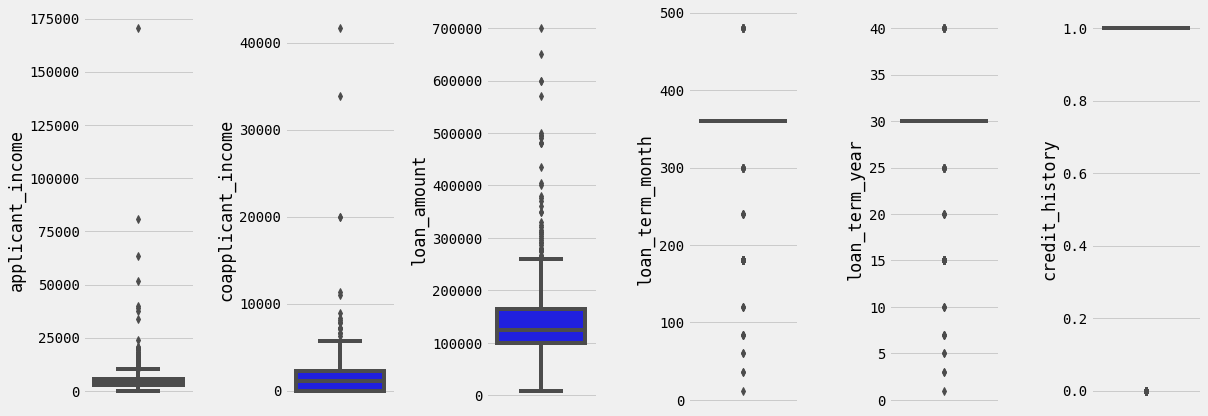

In [11]:
plt.figure(figsize=(17,6)) 
for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.boxplot(y=df[numeric[i]], color='blue', orient='v')
  plt.tight_layout()

Observation from this:
- many feature has outliers such as `applicant_income`, `coapplicant_income`, `loan_amount`

## Visualize Feature

Numerical columns

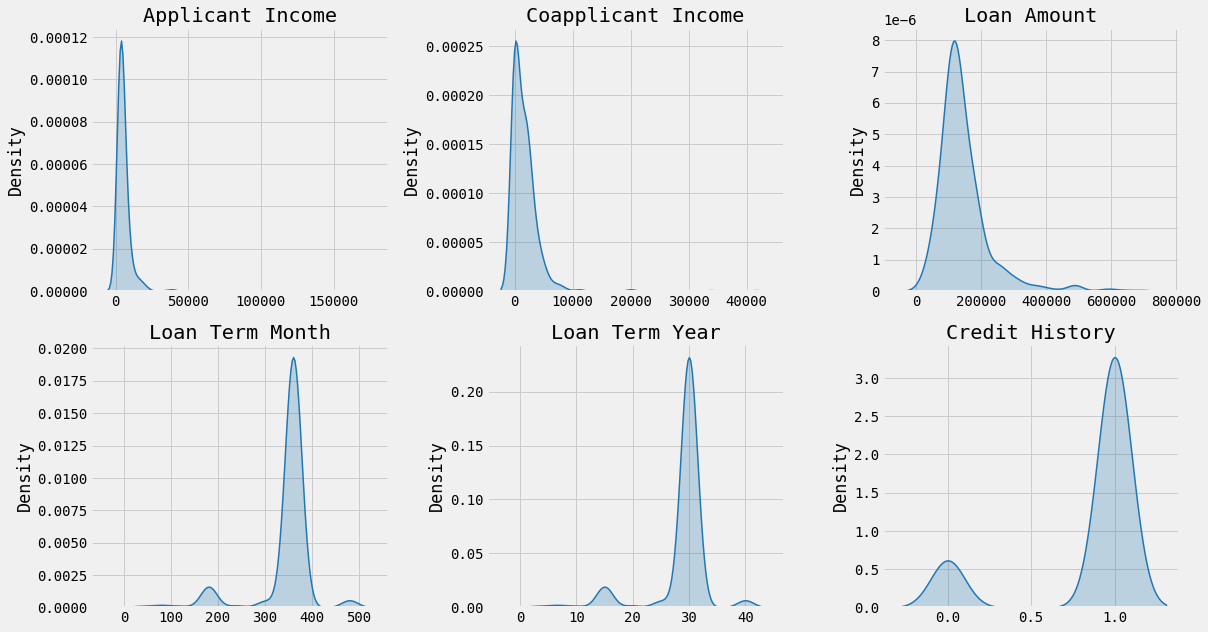

In [12]:
plt.figure(figsize=(17,9))

for i in range(0, len(numeric)):
  plt.subplot(2,len_column(numeric), i+1)
  ax = sns.kdeplot(x=df[numeric[i]], linewidth=1.5, fill=True)
  for container in ax.containers:
    ax.bar_label(container)
  
  plt.title(numeric[i].replace('_', ' ').title())
  plt.xlabel('')

  plt.tight_layout()

Observation from this:
- as expected `applicant_income`, `coapplicant_income`, `loan_amount` has skewwed
- after check visualize I realized that `loan_term_month` and `loan_term_years` has skewwed too
- `credit_history` only have 2 different value `0` and `1.0`

Categorical columns

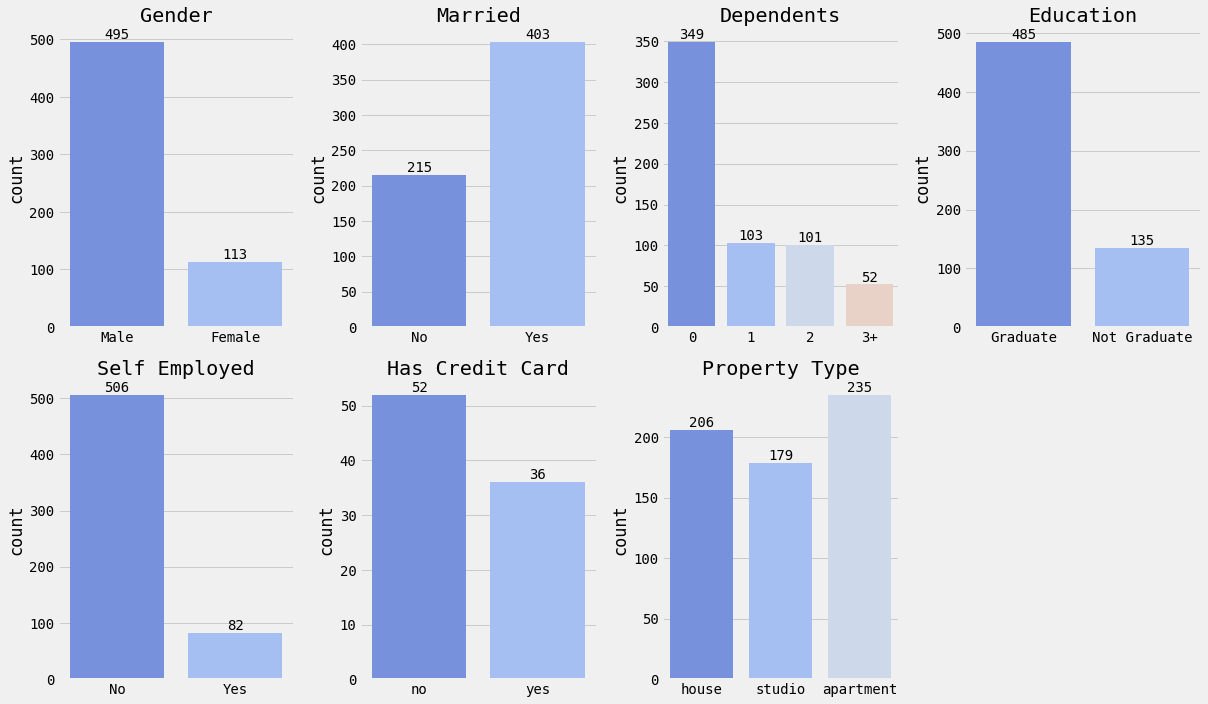

In [13]:
plt.figure(figsize=(17,10))

for i in range(0, len(categoric)):
  ax = plt.subplot(2,len_column(categoric),i+1)
  sns.countplot(data=df, x=categoric[i], palette=palette_colors)
  for container in ax.containers:
    ax.bar_label(container)
  
  plt.title(categoric[i].replace('_', ' ').title())
  plt.xlabel('')
  plt.tight_layout()

Observation from this:
- From `gender` Male more than Female 
- Maried more often take a loan rather than no maried
- From `dependents` there are imbalance data which is `0` has more frequency
- Many graduate person takes a loan rather than not graduate
- Someone who doesn't work more often takes a loan
- Apartment have take a loan rathen than other
- `has_credit_card` have so much missing value even **no** has high freq

## Visualize Class Distribution

Check distribution of **Class** column

In [14]:
loan_status = df['loan_status']
approved = loan_status.value_counts()[0]
rejected = loan_status.value_counts()[1]

percentage_approved = round(loan_status.value_counts(normalize=True)[0]*100,2)
percentage_rejected = round(loan_status.value_counts(normalize=True)[1]*100,2)

print(f'Aprroved Status: {approved} ({percentage_approved}%)')
print(f'Rejected Status: {rejected} ({percentage_rejected}%)')

Aprroved Status: 426 (68.6%)
Rejected Status: 195 (31.4%)


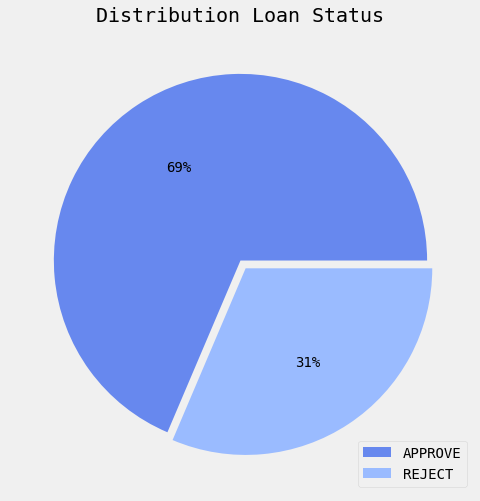

In [15]:
plt.figure(figsize=(17,8))

plt.pie([approved, rejected], colors=palette_colors, 
        autopct='%.0f%%', explode=[0, 0.05])
plt.title('Distribution Loan Status', fontsize=20)
plt.legend(list(loan_status.unique()), loc=4)
plt.show()

Observation from this:
- Many of loan are Approved with 426 frequency

## Check Missing Values

In [16]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

Observation from this:
- Many feature has **Missing value**
- The most is `has_credit_card` with 533 items

## Check Duplicate data

I preper to check duplicate data on **Identity** so I will use `loan_id` columns

In [17]:
print('Total Duplicate Data: {}'.format(df['loan_id'].duplicated().sum()))

Total Duplicate Data: 5


found 5 duplicate data lets chek with method `duplicated()` and put id with phone number to make sure this same person

In [18]:
duplicate_loan_id = df.duplicated(['loan_id','phone_number', 'loan_status'])

In [19]:
df[duplicate_loan_id]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


found duplicate data with Id:
- LP001310
- LP001904
- LP001990
-	LP002160
- LP002277

In [20]:
duplicate_id = ['LP001310','LP001904','LP001990','LP002160','LP002277']

df[df['loan_id'].isin(duplicate_id)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,NaN,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,NaN,house,REJECT
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
362,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


Obeservation from DataFrame:
- Almost all duplicate data had same values on their feature
- execpt id **LP002277, LP002160, LP001990, LP001310** the different on feature `has_credit_card` 

## Check Unique Value

In [21]:
df.nunique()

loan_id               616
birth_date            541
phone_number          564
gender                  2
married                 2
dependents              4
education               2
self_employed           2
applicant_income      500
coapplicant_income    287
loan_amount           203
loan_term_month        10
loan_term_year         10
credit_history          2
has_credit_card         2
property_type           3
loan_status             2
dtype: int64

In [22]:
check_overal_status(df)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,616,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,49,541,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,52,564,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,13,2,"[Male, Female, nan]"
4,married,object,3,2,"[No, Yes, nan]"
5,dependents,object,16,4,"[0, 1, 2, 3+, nan]"
6,education,object,1,2,"[Graduate, Not Graduate, nan]"
7,self_employed,object,33,2,"[No, Yes, nan]"
8,applicant_income,float64,9,500,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


Obeservation from Dataframe:
- Many feature has `nan` value this will be my concern
- Identity feature like birth_date, phone_number I prefer to drop `nan`
- feature `gender` has `nan`, I prefer to delete this because human only have 2 gender (male, female)
- `phone_number` maybe for convenient i will change data type to int 

# Data Cleansing

## Handling missing values

first I try to drop 3 Important value from Id such as `birth_date`, `phone_number` and `gender`

In [23]:
df_drop_3 = df.dropna(axis=0, how='any', subset=['birth_date', 'phone_number', 'gender'])

In [24]:
check_overal_status(df_drop_3)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,511,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,0,487,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,0,511,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,0,2,"[Male, Female]"
4,married,object,2,2,"[No, Yes, nan]"
5,dependents,object,13,4,"[0, 1, 2, 3+, nan]"
6,education,object,1,2,"[Graduate, Not Graduate, nan]"
7,self_employed,object,27,2,"[No, Yes, nan]"
8,applicant_income,float64,8,420,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,246,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


In [25]:
df_drop_3.loc[df['married'].isna(), :]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
105,LP001357,1989-05-26,6.281328e+11,Male,NaN,NaN,Graduate,No,NaN,754.0,160000,360,30,1.0,NaN,house,APPROVE
229,LP001760,1986-04-09,6.285720e+11,Male,NaN,NaN,Graduate,No,4758.0,0.0,158000,480,40,1.0,no,apartment,APPROVE


there are only 2 Id founded has *Missing Value* on `married` feature I will drop this, andother feature like `dependents`, `self_employed`, `applicant_income` and `credit_history`.

In [26]:
subsets = ['married', 'dependents', 'self_employed', 
           'applicant_income', 'credit_history']
df_drop = df_drop_3.dropna(axis=0, how='any', subset=subsets)

In [27]:
check_overal_status(df_drop)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,429,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,0,411,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,0,429,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,0,2,"[Male, Female]"
4,married,object,0,2,"[No, Yes]"
5,dependents,object,0,4,"[0, 1, 2, 3+]"
6,education,object,0,2,"[Graduate, Not Graduate]"
7,self_employed,object,0,2,"[No, Yes]"
8,applicant_income,float64,0,368,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,211,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


check frequency for `has_credit_card` and `credit_history` feature

In [28]:
df_drop.has_credit_card.value_counts()

no     30
yes    22
Name: has_credit_card, dtype: int64

In [29]:
df_drop.credit_history.value_counts()

1.0    366
0.0     68
Name: credit_history, dtype: int64

In [30]:
has_card_zero_credit = df_drop.loc[(df_drop['has_credit_card'] == 'yes') & (df_drop['credit_history'] == 0.0), :]
no_card_zero_credit = df_drop.loc[(df_drop['has_credit_card'] == 'no') & (df_drop['credit_history'] == 0.0), :]

has_card_and_credit = df_drop.loc[(df_drop['has_credit_card'] == 'yes') & (df_drop['credit_history'] == 1.0), :]
no_card_have_credit = df_drop.loc[(df_drop['has_credit_card'] == 'no') & (df_drop['credit_history'] == 1.0), :]

null_card_zero_credit = df_drop.loc[(df_drop['has_credit_card'].isna()) & (df_drop['credit_history'] == 0.0), :]
null_card_have_credit = df_drop.loc[(df_drop['has_credit_card'].isna()) & (df_drop['credit_history'] == 1.0), :]

In [31]:
temp_credit = [has_card_zero_credit, no_card_zero_credit ,has_card_and_credit,
               no_card_have_credit, null_card_zero_credit, null_card_have_credit]

len_credit = [len(i) for i in temp_credit]

data = {'name': ['has_card_zero_credit', 'no_card_zero_credit' ,'has_card_and_credit',
               'no_card_have_credit', 'null_card_zero_credit', 'null_card_have_credit'],
        'len': len_credit}

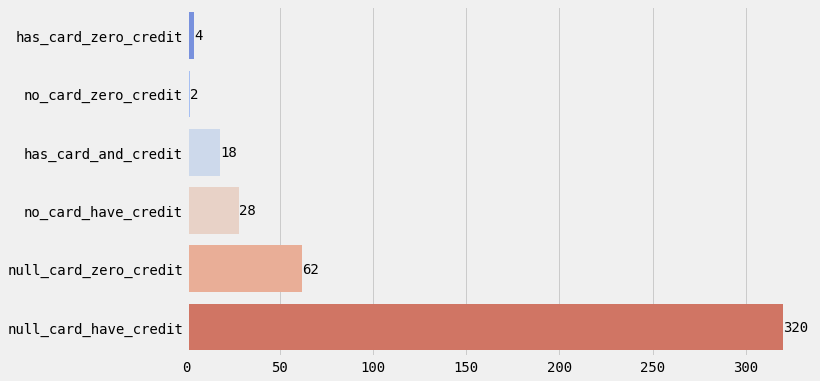

In [32]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=data, x='len', y='name', 
                orient='h', palette=palette_colors)
ax.bar_label(ax.containers[0])

plt.show()

I have no idea for `nan` value in feature `has_credit_card` so better to skip this one until get more description.

In [33]:
df_drop = df_drop.drop('has_credit_card', axis=1)

## Handling duplicated data

In [34]:
df_drop[df_drop.duplicated()]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [35]:
df_drop[df_drop['loan_id'].isin(['LP001904'])]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE


In [36]:
clear_df = df_drop.drop_duplicates(subset=['loan_id'])

In [37]:
print(f'Total Duplicate Data: {clear_df.duplicated().sum()}')

Total Duplicate Data: 0


## Handling Outlier

I use Z-score for handling outlier

In [38]:
outlier_column = ['applicant_income', 'coapplicant_income', 'loan_amount']

z = np.abs(zscore(clear_df[outlier_column]))

threshold(z, clear_df[outlier_column])

With threshold 3.0 data loss is 3.73%
With threshold 3.2 data loss is 3.5%
With threshold 3.4 data loss is 3.03%
With threshold 3.6 data loss is 2.8%
With threshold 3.8 data loss is 2.33%
With threshold 4.0 data loss is 2.33%
With threshold 4.2 data loss is 2.33%
With threshold 4.4 data loss is 2.1%
With threshold 4.6 data loss is 1.63%
With threshold 4.8 data loss is 1.63%


I use threshold < 3 because has highest loss data

In [39]:
clear_df_without_outlier = clear_df[(z < 3.0).all(axis=1)]

In [40]:
print(f'Total Data before Handling outliers : {clear_df.shape[0]}')
print(f'Total Data after Handling outliers : {clear_df_without_outlier.shape[0]}')

Total Data before Handling outliers : 429
Total Data after Handling outliers : 413


## Feature Encoding

In [41]:
encode_df = clear_df_without_outlier.copy()

In [42]:
# Encode Binary Value

encode_df['gender'] = np.where(encode_df["gender"].str.contains("Male"), 1, 0)
encode_df['married'] = np.where(encode_df["married"].str.contains("Yes"), 1, 0)
encode_df['education'] = np.where(encode_df["education"] == 'Graduate', 1, 0)
encode_df['self_employed'] = np.where(encode_df["self_employed"].str.contains("Yes"), 1, 0)

In [43]:
encode_df['property_type'] = encode_df['property_type'].astype('category')
encode_df['property_type']= encode_df['property_type'].cat.codes

In [44]:
encode_df['phone_number'] = encode_df['phone_number'].astype('int64')

In [45]:
encode_df.head(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187,1,0,0,1,0,5849.0,0.0,100000,360,30,1.0,1,APPROVE
1,LP001003,1979-08-24,628776449212,1,1,1,1,0,4583.0,1508.0,128000,360,30,1.0,2,REJECT
2,LP001005,1991-03-28,628119240537,1,1,0,1,1,3000.0,0.0,66000,360,30,1.0,1,APPROVE
3,LP001006,1980-06-02,62856343702,1,1,0,0,0,2583.0,2358.0,120000,360,30,1.0,1,APPROVE
4,LP001008,1989-05-19,628113008687,1,0,0,1,0,6000.0,0.0,141000,360,30,1.0,1,APPROVE
5,LP001011,1986-01-22,62811028825,1,1,2,1,1,5417.0,4196.0,267000,360,30,1.0,1,APPROVE
6,LP001013,1979-06-16,628111840127,1,1,0,0,0,2333.0,1516.0,95000,360,30,1.0,1,APPROVE
7,LP001014,1999-05-21,628567566695,1,1,3+,1,0,3036.0,2504.0,158000,360,30,0.0,0,REJECT
8,LP001018,1987-08-25,628528959314,1,1,2,1,0,4006.0,1526.0,168000,360,30,1.0,1,APPROVE
10,LP001024,1984-03-08,628116652331,1,1,2,1,0,3200.0,700.0,70000,360,30,1.0,1,APPROVE


Note Encoder:


|Feature|Keywords|
|---|---|
|gender|`Male`= 1; `Female`= 0|
|married|`Yes`= 1; `No`= 0|
|education|`Graduate`= 1; `Not Graduate`= 0|
|self_employed|`Yes`= 1; `No`= 0|
|property_type|`apartement`= 0; `house`= 1; `studio` = 2|

# Business Insight

In [46]:
new_df = clear_df_without_outlier.copy()

## Analisis minat pelanggan berdasarkan pada tipe properti

In [47]:
new_df.groupby(['property_type', 'gender']).agg({'gender':'count'})

gender
property_type gender        
apartment     Female      38
              Male       126
house         Female      22
              Male       112
studio        Female      18
              Male        97

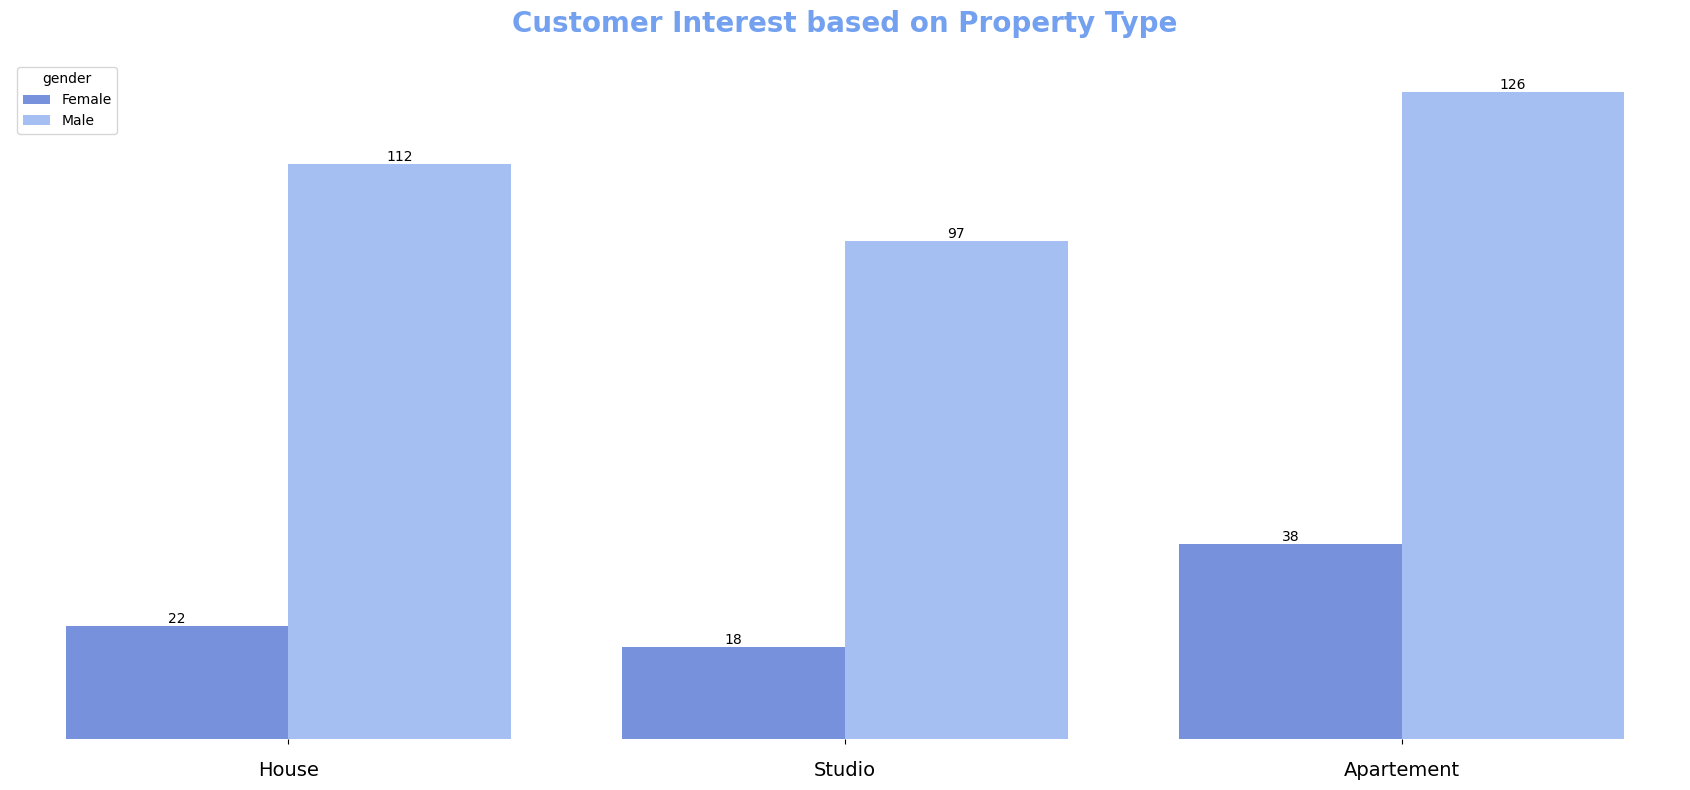

In [48]:
plt.style.use('default')
plt.figure(figsize=(17,8))

ax = sns.countplot(x=new_df['property_type'], hue=new_df['gender'], 
                    data=new_df, palette=palette_colors, hue_order=['Female','Male'])

# Hidden line for x and y 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize ticks
plt.tick_params(axis = 'y', which = 'both', left = False, 
                right = False, labelleft = False)
plt.ylabel('')
plt.tick_params(axis = 'x', which = 'both', bottom = True, 
                top = False, labelbottom = True, pad = 12)
plt.xticks(np.arange(3), ['House', 'Studio', 'Apartement'], size = 14)
plt.xlabel('')

ax.set_title(label='Customer Interest based on Property Type',
              fontsize = 20, fontweight='bold', color='#73a1f0', pad=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.tight_layout()
plt.show()

In [49]:
new_df.groupby(['property_type', 'self_employed', 'gender']).agg({'property_type':'count'})

property_type
property_type self_employed gender               
apartment     No            Female             32
                            Male              113
              Yes           Female              6
                            Male               13
house         No            Female             20
                            Male              100
              Yes           Female              2
                            Male               12
studio        No            Female             16
                            Male               82
              Yes           Female              2
                            Male               15

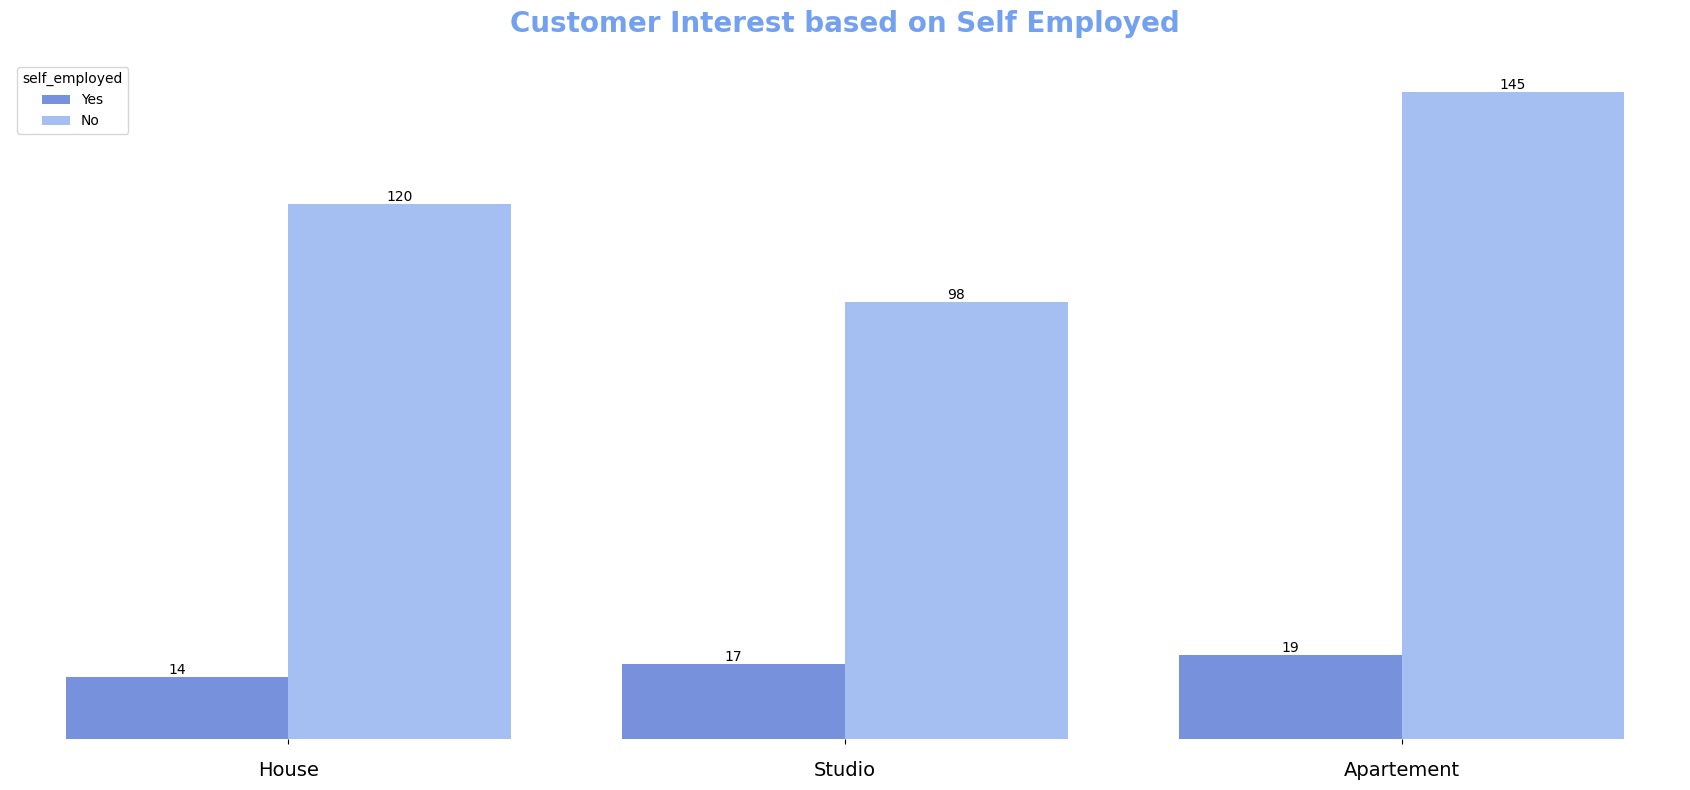

In [50]:
plt.style.use('default')
plt.figure(figsize=(17,8))

ax = sns.countplot(x=new_df['property_type'], hue=new_df['self_employed'], 
                    data=new_df, palette=palette_colors, hue_order=['Yes','No'])

# Hidden line for x and y 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize ticks
plt.tick_params(axis = 'y', which = 'both', left = False, 
                right = False, labelleft = False)
plt.ylabel('')
plt.tick_params(axis = 'x', which = 'both', bottom = True, 
                top = False, labelbottom = True, pad = 12)
plt.xticks(np.arange(3), ['House', 'Studio', 'Apartement'], size = 14)
plt.xlabel('')

ax.set_title(label='Customer Interest based on Self Employed',
              fontsize = 20, fontweight='bold', color='#73a1f0', pad=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.tight_layout()
plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [51]:
new_df.groupby(['loan_term_month', 'married']).agg({'loan_term_month':'count'})

loan_term_month
loan_term_month married                 
36              No                     2
60              No                     1
                Yes                    1
84              Yes                    3
120             No                     1
                Yes                    1
180             No                     4
                Yes                   26
240             Yes                    2
300             No                     3
                Yes                    5
360             No                   136
                Yes                  217
480             No                     6
                Yes                    5

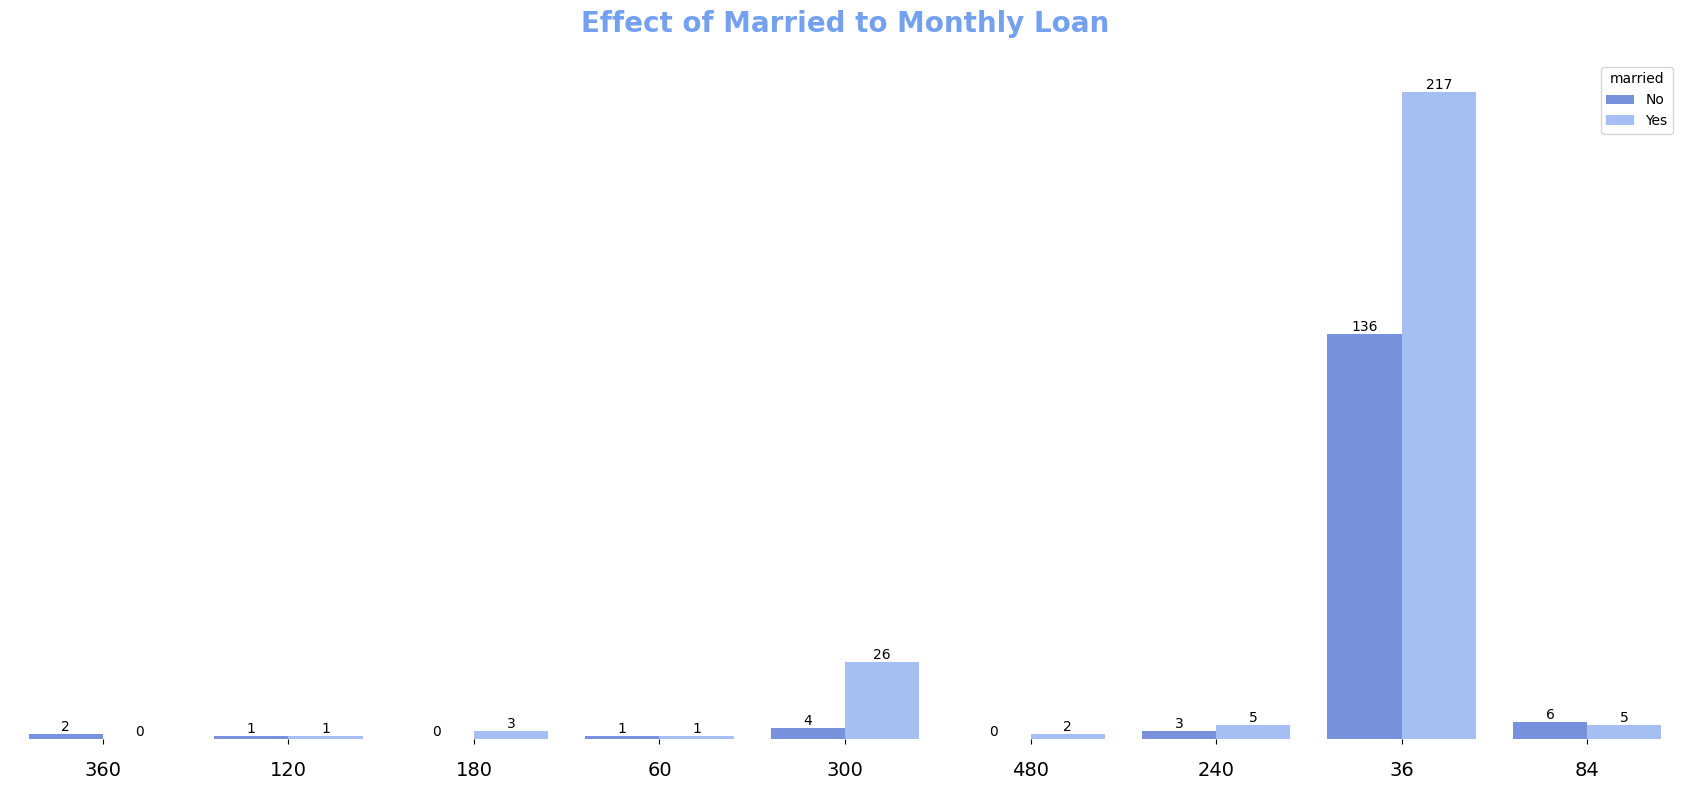

In [52]:
plt.style.use('default')
plt.figure(figsize=(17,8))

value_unique = new_df.loan_term_month.unique().tolist()
ax = sns.countplot(x=new_df['loan_term_month'], hue=new_df['married'], 
                    data=new_df, palette=palette_colors, hue_order=['No','Yes'])

# Hidden line for x and y 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize ticks
plt.tick_params(axis = 'y', which = 'both', left = False, 
                right = False, labelleft = False)
plt.ylabel('')
plt.tick_params(axis = 'x', which = 'both', bottom = True, 
                top = False, labelbottom = True, pad = 12)
plt.xticks(np.arange(len(value_unique)), value_unique, size = 14)
plt.xlabel('')

ax.set_title(label='Effect of Married to Monthly Loan',
              fontsize = 20, fontweight='bold', color='#73a1f0', pad=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.tight_layout()
plt.show()

In [53]:
new_df.groupby(['loan_term_year', 'married']).agg({'loan_term_year':'count'})

loan_term_year
loan_term_year married                
3              No                    2
5              No                    1
               Yes                   1
7              Yes                   3
10             No                    1
               Yes                   1
15             No                    4
               Yes                  26
20             Yes                   2
25             No                    3
               Yes                   5
30             No                  136
               Yes                 217
40             No                    6
               Yes                   5

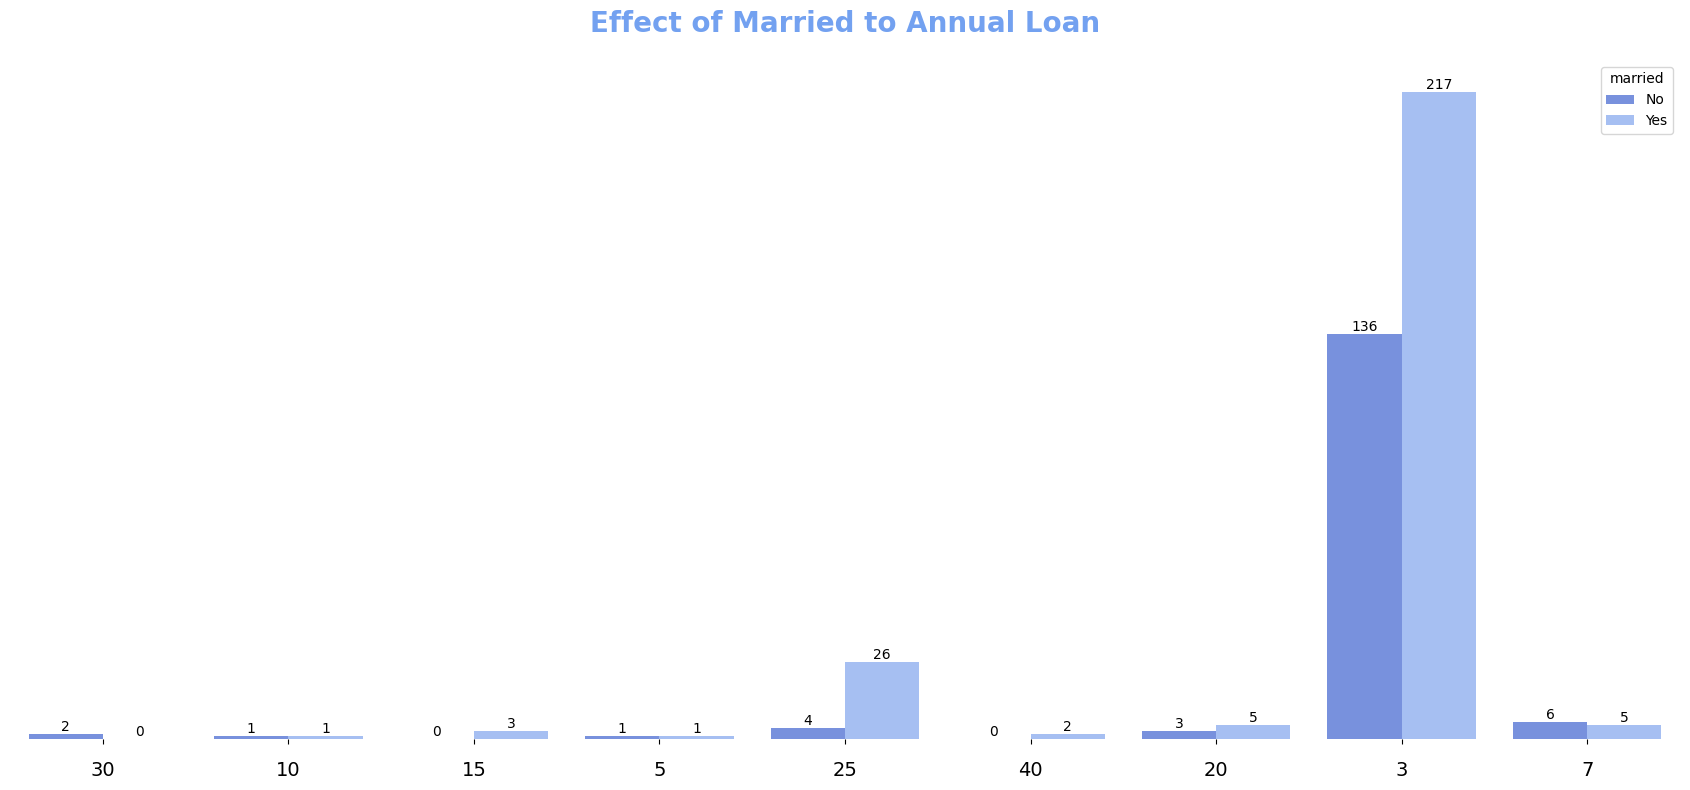

In [54]:
plt.style.use('default')
plt.figure(figsize=(17,8))

value_unique = new_df.loan_term_year.unique().tolist()
ax = sns.countplot(x=new_df['loan_term_year'], hue=new_df['married'], 
                    data=new_df, palette=palette_colors, hue_order=['No','Yes'])

# Hidden line for x and y 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize ticks
plt.tick_params(axis = 'y', which = 'both', left = False, 
                right = False, labelleft = False)
plt.ylabel('')
plt.tick_params(axis = 'x', which = 'both', bottom = True, 
                top = False, labelbottom = True, pad = 12)
plt.xticks(np.arange(len(value_unique)), value_unique, size = 14)
plt.xlabel('')

ax.set_title(label='Effect of Married to Annual Loan',
              fontsize = 20, fontweight='bold', color='#73a1f0', pad=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.tight_layout()
plt.show()